<a href="https://colab.research.google.com/github/labib1910024/Deep-Learning_Basic/blob/main/pima_indians_diabetes_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: pima-indians-diabetes.csv  


In [2]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [3]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

In [4]:
# First five elements of dataset.
dataset[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00]])

In [6]:
# Length of Dataset
len(dataset)

768

In [8]:
# Split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

In [13]:
X.shape,y.shape

((768, 8), (768,))

In [16]:
X_train.shape,y_train.shape

((460, 8), (460,))

In [17]:
X_cv.shape,y_cv.shape

((124, 8), (124,))

In [18]:
X_test.shape,y_test.shape

((184, 8), (184,))

In [19]:
# Define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

In [24]:
model.predict(X)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.39045247],
       [0.23886836],
       [0.5570778 ],
       [0.2337765 ],
       [0.40110567],
       [0.27624062],
       [0.25351694],
       [0.6711364 ],
       [0.5928672 ],
       [0.26816314],
       [0.24998826],
       [0.4884632 ],
       [0.34836575],
       [0.7656121 ],
       [0.40829247],
       [0.5950637 ],
       [0.27617425],
       [0.27182308],
       [0.3346869 ],
       [0.25766274],
       [0.2827993 ],
       [0.2500704 ],
       [0.47721073],
       [0.2895084 ],
       [0.30833825],
       [0.3236974 ],
       [0.38783106],
       [0.2553857 ],
       [0.35976812],
       [0.24590634],
       [0.2943752 ],
       [0.36652982],
       [0.23742238],
       [0.2328958 ],
       [0.31432158],
       [0.30945447],
       [0.37796745],
       [0.2847292 ],
       [0.25443003],
       [0.322762  ],
       [0.39281413],
       [0.3158178 ],
       [0.23700567],
       [0.32992452],
       [0.46459642],
       [0.50452006],
       [0.4259508 ],
       [0.226

In [29]:
# Make class predictions with the model
predictions = (model.predict(X) > 0.3).astype(int)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [26]:
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


<ipython-input-26-b7b270ed2d5f>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


In [30]:
from sklearn.metrics import f1_score
f1_score(predictions,y)

0.6193548387096774

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop


X = dataset[:, 0:8]
y = dataset[:, 8]


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.4, random_state=42)


weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))


model = Sequential()
model.add(Dense(64, input_shape=(8,)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_cv, y_cv),epochs=150, batch_size=10, class_weight=class_weights,callbacks=[early_stop], verbose=0)


y_probs = model.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
f1_scores = [f1_score(y_test, (y_probs > t).astype(int)) for t in thresholds]
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"\nBest F1 Score: {best_f1:.4f} at Threshold: {best_threshold:.2f}\n")


final_preds = (model.predict(X) > best_threshold).astype(int)

for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), final_preds[i], y[i]))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Best F1 Score: 0.6515 at Threshold: 0.52

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0.6399472601593618, 0.8483237946271883, 0.149640752628208, 0.9072699252723591, -0.6928905722954664, 0.20401277134626386, 0.4684919773786552, 1.4259954044228451] => 1 (expected 1)
[-0.8448850534430246, -1.1233963609784168, -0.16054574674686284, 0.5309015587207719, -0.6928905722954664, -0.6844219461567719, -0.36506077757159777, -0.19067190513648619] => 0 (expected 0)
[1.233880185600316, 1.9437238810747468, -0.2639412465385531, -1.2882122129452327, -0.6928905722954664, -1.1032554558367744, 0.6043973178596749, -0.10558415200178453] => 1 (expected 1)
[-0.8448850534430246, -0.9982077796701243, -0.16054574674686284, 0.15453319216918474, 0.12330164444496873, -0.49404307812040704, -0.9207626142050997, -1.0415494364835027] => 0 (expected 0)
[-1.141851516163502, 0.5040551960293843, -1.5046872440388366, 0.9072699252723591, 0.7658359427299921, 1.4097456022432409, 5.4849091004669

<ipython-input-33-a62022ea70d1>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X[i].tolist(), final_preds[i], y[i]))


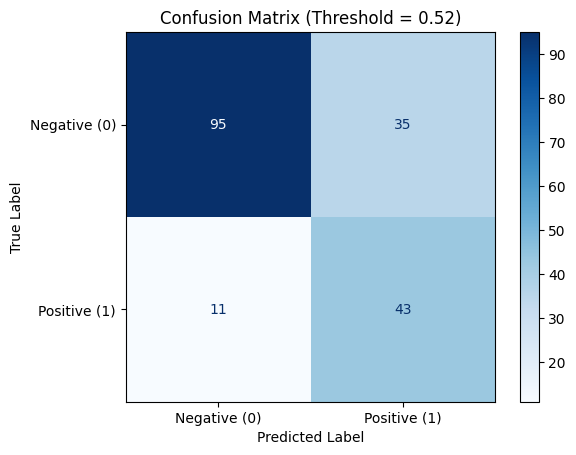

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the best threshold found earlier
y_pred = (y_probs > best_threshold).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative (0)", "Positive (1)"])
disp.plot(cmap=plt.cm.Blues)

plt.title(f'Confusion Matrix (Threshold = {best_threshold:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()
